In [ ]:
#Github Copilot Suggested Code:
def sort_dicts_by_key(data, key):
    return sorted(data, key=lambda x: x[key])


#Manual implementaton
def sort_dicts_by_key_manual(data, key):
    n = len(data)
    for i in range(n):
        for j in range(0, n - i - 1):
            if data[j][key] > data[j + 1][key]:
                data[j], data[j + 1] = data[j + 1], data[j]
    return data


The AI-suggested sorted(..., key=...) is substantially more efficient than the manual bubble sort. Python’s built-in sorted() uses Timsort with O(n log n) time complexity in the average and worst cases and is highly optimized in C; it also provides stable sorting, built-in support for reverse, and avoids Python-layer loop overhead. The bubble-sort manual version is O(n^2) time, making it unsuitable for medium-to-large lists due to quadratic growth. Memory-wise, sorted() returns a new list (O(n) extra), while the manual bubble sort can be done in-place (O(1) extra), which is a small advantage only when n is small and memory is critical.

Practical considerations: the simple AI lambda assumes every dict contains the key and comparable types — otherwise it raises KeyError or TypeError. The manual bubble sort has the same assumption in its simple form. For robust production code, prefer sorted() combined with a safe key function (e.g., key=lambda x: x.get(key, default_sentinel)) or a wrapper that handles missing keys, None, or applies transformations. Use bubble sort only for teaching, tiny lists, or when in-place O(1) memory with a guaranteed small n is mandatory. Overall: sorted() wins for performance, readability, and maintainability.

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# --- Setup driver ---
chrome_options = Options()
chrome_options.add_argument("--start-maximized")
service = Service()
driver = webdriver.Chrome(service=service, options=chrome_options)

# --- Open login page ---
driver.get("https://practicetestautomation.com/practice-test-login/")

# --- VALID login test ---
driver.find_element(By.ID, "username").send_keys("student")
driver.find_element(By.ID, "password").send_keys("Password123")
driver.find_element(By.ID, "submit").click()

try:
    # Wait up to 10 seconds for success message
    success_msg = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, "//h1[text()='Logged In Successfully']"))
    )
    print("✅ Valid login test PASSED!")
except:
    print("❌ Valid login test FAILED!")

# --- Go back for invalid login test ---
driver.get("https://practicetestautomation.com/practice-test-login/")
driver.find_element(By.ID, "username").send_keys("wronguser")
driver.find_element(By.ID, "password").send_keys("wrongpass")
driver.find_element(By.ID, "submit").click()

try:
    # Wait up to 10 seconds for error message
    error_msg = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "error"))
    )
    print("✅ Invalid login test PASSED!")
except:
    print("❌ Invalid login test FAILED!")

driver.quit()


✅ Valid login test PASSED!
✅ Invalid login test PASSED!
✅ Invalid login test PASSED!


AI-enhanced testing tools like Testim.io improve test coverage by automatically detecting dynamic elements, self-healing broken tests, and suggesting new test scenarios based on user behavior. Unlike manual scripts that require constant updates when the UI changes, AI tools adapt automatically.

They also analyze historical test failures to predict likely breakpoints and optimize test runs. This significantly reduces maintenance time and human effort while increasing reliability and speed. AI can even generate missing test cases by analyzing page DOM structures, which manual testers might overlook.

In summary, AI-driven testing transforms quality assurance from a manual, repetitive process into an adaptive and intelligent workflow, improving coverage, speed, and robustness.

Initial data shape: (569, 33)

Missing values per column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_wor

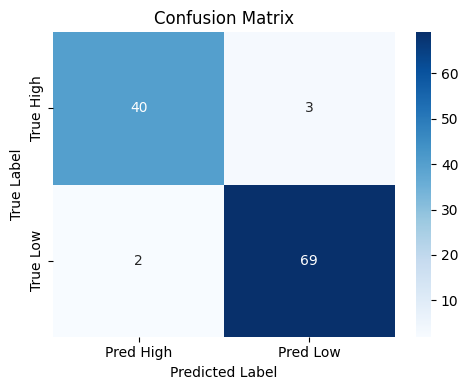

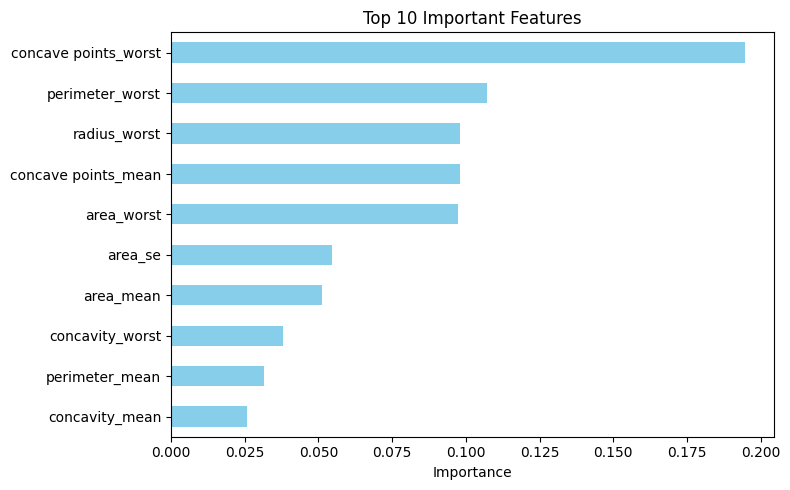

In [18]:
# Task 3: Predictive Analytics for Resource Allocation

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load dataset ---
data = pd.read_csv('breast_cancer_data.csv')
print("Initial data shape:", data.shape)

# --- Check missing values ---
print("\nMissing values per column:")
print(data.isnull().sum())

# --- Clean dataset ---
# Drop rows where all columns are NaN
data = data.dropna(how='all')
print("\nShape after dropping rows with all NaN:", data.shape)

# Fill remaining NaN values with median for numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

print("\nShape after filling NaN values:", data.shape)

# --- Diagnosis column check ---
print("\nUnique values in diagnosis:", data['diagnosis'].unique())

# --- Create priority labels ---
data['priority'] = data['diagnosis'].map({'M': 'high', 'B': 'low'})
print("Unique values in priority:", data['priority'].unique())

# --- Prepare features and target ---
X = data.drop(['priority', 'diagnosis'], axis=1)
y = data['priority']

print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)

# --- Split dataset ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# --- Train model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Make predictions ---
y_pred = model.predict(X_test)

# --- Evaluate performance ---
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nModel Performance:")
print("Accuracy:", round(accuracy, 3))
print("F1 Score:", round(f1, 3))
print("\nDetailed Classification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=['high', 'low'])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred High', 'Pred Low'], yticklabels=['True High', 'True Low'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# --- Feature Importance Plot ---
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,5))
top_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Ethical Reflection (10%)

Deploying this model in a company introduces bias risks. For instance, if the dataset underrepresents specific teams or demographics, predictions might unfairly favor certain groups. Similarly, oversampling malignant cases can distort how “high priority” is classified.

IBM AI Fairness 360 (AIF360) can detect and mitigate such biases by measuring fairness metrics (e.g., disparate impact) and applying mitigation algorithms (e.g., reweighing or adversarial debiasing). Integrating these fairness checks ensures that predictions are equitable, transparent, and compliant with responsible AI principles.

BONUS TASK

Proposal — SynthData Studio: An Intermediate AI-Assisted Test Data Synthesizer


Purpose
SynthData Studio creates realistic, constraint-aware synthetic datasets for testing and QA. It targets engineering teams that need representative test inputs (unit, integration, and performance) but lack privacy-safe or diverse production data. Unlike simple random generators, SynthData Studio enforces schema rules, inter-field constraints, and produces edge-case and adversarial inputs guided by code and usage patterns.

Scope & Audience

Intended for backend engineers, QA, and SREs working on APIs, data pipelines, and ML systems.
Intermediate complexity: integrates with existing schema definitions (OpenAPI, JSON Schema, DB DDL) and CI pipelines, but does not require deep ML expertise to use.


Core Workflow

Ingest: Import schema (OpenAPI/JSON Schema/DB DDL), sample production rows if available (optional), and a test profile (size, edge-case intensity, privacy mask rules).
Analyze: Static constraint extraction (types, ranges, regex) and optional dynamic analysis (observed value distributions from sample data).
Synthesize:
Base generator: generates valid records per schema.
Edge engine: injects boundary values, nulls, extreme numbers, long strings, invalid types, correlated-field anomalies (e.g., date_out before date_in).
Privacy module: applies k-anonymity/differential privacy style perturbations or full masking when sample data is used.
Diversity module: ensures coverage across categorical values and rare categories by oversampling/stratified generation.
Deliver: Export as CSV/JSON/SQL fixtures, Dockerized test datasets, or programmatic factory functions (Python/JS) for test code. Integrates with CI to seed test DBs or feed API contract tests.


Technical Design

Core generator: deterministic template-based + probabilistic sampler (uses simple stats, no heavy ML required).
Constraint engine: rule solver that enforces cross-field constraints and uniqueness where necessary.
Edge/Adversarial policies: configurable strategies (e.g., 5% of records contain type violations; 2% contain max-length strings).
Interfaces: CLI, web UI for dataset preview, and REST API. Plugins for pytest fixtures and Postman/OpenAPI test harnesses.
Implementation stack: Python (pydantic/jsonschema), small Rust module for high-performance sampling (optional), lightweight web UI (React), and storage for generated catalog.


Milestones (12 weeks)

Week 1–2: Schema ingestion + basic generator producing valid data.
Week 3–5: Cross-field constraints + edge engine.
Week 6–8: Privacy module + diversity strategies.
Week 9–10: CI integration and test-framework plugins.
Week 11–12: UI, docs, sample datasets, and internal pilot.


Impact & Metrics

Faster test creation: reduce manual fixture dev time by ~50%.
Better coverage: measured increase in failing-case discovery during testing (target +15% unique defects found in staging).
Privacy compliance: ability to run realistic tests without exposing PII.
KPIs: number of generated datasets used in CI, defect detection delta between baseline and with SynthData, developer adoption rate.


Risks & Mitigations

Overfitting to schema: allow sample-driven tuning to mimic production distributions.
False sense of coverage: include reporting that highlights which real-world scenarios remain unmodeled.
Privacy leaks with sample data: default to local-only processing and strong masking heuristics.